In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
# Load the Excel file again to check the available sheets and read the specified sheets
data_path = "Visa Climate Tech Data.xlsx"
xls = pd.ExcelFile(data_path)

# Check the sheet names to ensure they match the requested names
sheet_names = xls.sheet_names
sheet_names


['Disclaimer',
 'Intro to dataset',
 '1_Persona definition',
 '2_Card data',
 '3_Open banking data']

In [40]:
# Load data from the "2_Card data" sheet
card_data = pd.read_excel(data_path, sheet_name='2_Card data')

# Display the first few rows and summary information about the "2_Card data" sheet
card_data.head(), card_data.info(), card_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cpd_mnth_id            1379 non-null   int64         
 1   cpd_dt                 1379 non-null   datetime64[ns]
 2   cluster_name_adjusted  1379 non-null   object        
 3   mrch_catg_cd           1379 non-null   int64         
 4   mrch_catg_rlup_nm      1378 non-null   object        
 5   merchant               1379 non-null   object        
 6   cp_flag                1379 non-null   int64         
 7   domestic_flag          1379 non-null   int64         
 8   intraregion_flag       1379 non-null   int64         
 9   interregion_flag       1379 non-null   int64         
 10  city_name              1379 non-null   object        
 11  country_code           1379 non-null   int64         
 12  spend                  1379 non-null   float64       
dtypes: 

C:\Users\skotian\AppData\Local\Temp\ipykernel_14696\1166657466.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  card_data.head(), card_data.info(), card_data.describe(include='all')


(   cpd_mnth_id     cpd_dt cluster_name_adjusted  mrch_catg_cd  \
 0       202306 2023-06-08                Family          7523   
 1       202306 2023-06-13      Affluent Segment          5499   
 2       202307 2023-07-09      Affluent Segment          5499   
 3       202306 2023-06-13      Affluent Segment          5499   
 4       202307 2023-07-09      Affluent Segment          5499   
 
              mrch_catg_rlup_nm merchant  cp_flag  domestic_flag  \
 0  PARKING LOTS,METERS,GARAGES    APCOA        0              1   
 1   MISC FOOD STORES - DEFAULT      NYA        1              1   
 2   MISC FOOD STORES - DEFAULT      NYA        1              1   
 3   MISC FOOD STORES - DEFAULT      NYA        1              1   
 4   MISC FOOD STORES - DEFAULT      NYA        1              1   
 
    intraregion_flag  interregion_flag      city_name  country_code  spend  
 0                 0                 0  Not_Available           826   6.25  
 1                 0                 0

# Columns in Card data
-  cpd_mnth_id: Numerical identifier for the month of transaction.<br>
-  cpd_dt: Date of the transaction.<br>
-  cluster_name_adjusted: Consumer cluster segment, e.g., "Family," "Affluent Segment."<br>
-  mrch_catg_cd: Merchant category code.<br>
-  mrch_catg_rlup_nm: General name for the merchant category, e.g., "PARKING LOTS, METERS, GARAGES."<br>
-  merchant: Name of the merchant.<br>
-  cp_flag: Indicates if the transaction is a card present transaction (1 for true).<br>
-  domestic_flag: Indicates if the transaction is domestic (1 for true).<br>
-  intraregion_flag: Indicates if the transaction is within the same region (1 for true).<br>
-  interregion_flag: Indicates if the transaction is between different regions (1 for true).<br>
-  city_name: City where the transaction occurred.<br>
-  country_code: Country code for the transaction location.<br>
-  spend: Amount spent in the transaction.<br>

In [41]:
# Load data from the "3_Open banking data" sheet
open_banking_data = pd.read_excel(data_path, sheet_name='3_Open banking data')

# Display the first few rows and summary information about the "3_Open banking data" sheet
open_banking_data.head(), open_banking_data.info(), open_banking_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       1378 non-null   object        
 1   Value.accountId            1378 non-null   object        
 2   cluster_name_adjusted      1378 non-null   object        
 3   Value.amount.currencyCode  1378 non-null   object        
 4   mrch_catg_rlup_nm2         1378 non-null   object        
 5   Value.dates.booked         1378 non-null   datetime64[ns]
 6   amount                     1378 non-null   float64       
 7   Category                   1372 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 86.2+ KB


C:\Users\skotian\AppData\Local\Temp\ipykernel_14696\497471565.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  open_banking_data.head(), open_banking_data.info(), open_banking_data.describe(include='all')


(           Name                   Value.accountId cluster_name_adjusted  \
 0  transactions  5a73582adf954cf6b3db6cc97bedccd9      Affluent Segment   
 1  transactions  5a73582adf954cf6b3db6cc97bedccd9      Affluent Segment   
 2  transactions  5a73582adf954cf6b3db6cc97bedccd9      Affluent Segment   
 3  transactions  5a73582adf954cf6b3db6cc97bedccd9      Affluent Segment   
 4  transactions  6r88582adf954cf6b3db6cc97bedccd9        Urban Spenders   
 
   Value.amount.currencyCode       mrch_catg_rlup_nm2 Value.dates.booked  \
 0                       GBP   AMUSEMENT PARKS/CIRCUS         2023-05-12   
 1                       GBP   AMUSEMENT PARKS/CIRCUS         2023-05-12   
 2                       GBP   AMUSEMENT PARKS/CIRCUS         2023-06-02   
 3                       GBP   AMUSEMENT PARKS/CIRCUS         2023-06-02   
 4                       GBP  ART DEALERS & GALLERIES         2023-07-14   
 
    amount       Category  
 0    3.73  entertainment  
 1    3.73  entertainment  


### Columns Descriptions for '3_Open banking data'

- **Name**: Indicates the nature of the record, all entries are labeled as "transactions."
- **Value.accountId**: Account identifier for the transaction.
- **cluster_name_adjusted**: Consumer cluster segment, similar to the card data.
- **Value.amount.currencyCode**: Currency code for the transaction (all transactions are in GBP).
- **mrch_catg_rlup_nm2**: Merchant category name, providing a more detailed description than codes.
- **Value.dates.booked**: Date the transaction was recorded.
- **amount**: Transaction amount.
- **Category**: High-level category for the transaction, such as "shopping" or "entertainment."


In [42]:
card_data.mrch_catg_rlup_nm.unique()

array(['PARKING LOTS,METERS,GARAGES', 'MISC FOOD STORES - DEFAULT',
       'DEPARTMENT STORES', "GOV'T SERV - DEFAULT",
       'CHILDREN/INFANTS WEAR STORES', 'MENS/WOMENS CLOTHING STORES',
       'TAX PAYMENTS', 'THEATRICAL PRODUCERS', 'PASSENGER RAILWAYS',
       'FAST FOOD RESTAURANTS', 'GROCERY STORES/SUPERMARKETS',
       'LARGE DIGITAL GOODS MERCHANT', 'TELECOMMUNICATION EQUIPMENT',
       'CHARITABLE/SOC SERVICE ORGS', 'FLORISTS', 'TRAVEL AGENCIES',
       'SPORTING GOODS STORES', 'MISC SPECIALTY RETAIL',
       'CONTINUITY/SUBSCRIPTION MERCHT', 'DIGITAL GOODS BOOKSMOVIEMUSIC',
       'PROFESSIONAL SERVICES - DEF', 'CABLE, SAT, PAY TV/RADIO SVCS',
       'COMPUTER SOFTWARE STORES', 'WOMENS READY TO WEAR STORES',
       'VARIETY STORES', 'ARTIST/CRAFT SHOPS', 'SHOE STORES',
       'RESTAURANTS', 'BUYING/SHOPPING SERVICES',
       'TELECOMMUNICATION SERVICES', nan, 'MOTION PICTURE THEATRES',
       'CATERERS', 'HOME SUPPLY WAREHOUSE STORES', 'SERVICE STATIONS',
       'OTHER DIREC

In [43]:
open_banking_data.mrch_catg_rlup_nm2.unique()

array(['AMUSEMENT PARKS/CIRCUS', 'ART DEALERS & GALLERIES',
       'ARTIST/CRAFT SHOPS', 'AUTOMATED FUEL DISPENSERS',
       'AUTOMOTIVE TIRE STORES', 'BAKERIES', 'BANDS/ORCHESTRAS/ENTERTAIN',
       'BARS/TAVERNS/LOUNGES/DISCOS', 'BEAUTY/BARBER SHOPS',
       'BOOK STORES', 'BUS LINES', 'BUSINESS SERVICES - DEFAULT',
       'BUYING/SHOPPING SERVICES', 'CABLE, SAT, PAY TV/RADIO SVCS',
       'CATERERS', 'CHARITABLE/SOC SERVICE ORGS',
       'CHILDREN/INFANTS WEAR STORES', 'CIGAR STORES/STANDS',
       'COMMERCIAL EQUIPMENT - DEFAULT', 'COMPUTER SOFTWARE STORES',
       'CONTINUITY/SUBSCRIPTION MERCHT', 'COURIER SERVICES',
       'DENTISTS/ORTHODONTISTS', 'DEPARTMENT STORES',
       'DIGITAL GOODS BOOKSMOVIEMUSIC', 'DIGITAL GOODS GAMES',
       'DISCOUNT STORES', 'DRUG STORES & PHARMACIES',
       'ELECTRONICS STORES', 'FAMILY CLOTHING STORES',
       'FAST FOOD RESTAURANTS', 'FLORISTS', 'FREEZER/MEAT LOCKERS',
       'GIFT, CARD, NOVELTY STORES', "GOV'T SERV - DEFAULT",
       'GROCERY

In [44]:
open_banking_data.cluster_name_adjusted.unique()

array(['Affluent Segment', 'Urban Spenders', 'Frugal Family', 'Family',
       'Sensible Spenders'], dtype=object)

In [45]:
card_data.groupby(['cpd_mnth_id']).spend.sum()

cpd_mnth_id
202305    12879.01
202306    13203.49
202307    13750.49
Name: spend, dtype: float64

In [46]:
card_data.head()

,cpd_mnth_id,cpd_dt,cluster_name_adjusted,mrch_catg_cd,mrch_catg_rlup_nm,merchant,cp_flag,domestic_flag,intraregion_flag,interregion_flag,city_name,country_code,spend
0,202306,2023-06-08,Family,7523,"PARKING LOTS,METERS,GARAGES",APCOA,0,1,0,0,Not_Available,826,6.25
1,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.39
2,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.41
3,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.39
4,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.41


In [47]:
open_banking_data.head()

,Name,Value.accountId,cluster_name_adjusted,Value.amount.currencyCode,mrch_catg_rlup_nm2,Value.dates.booked,amount,Category
0,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,2023-05-12,3.73,entertainment
1,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,2023-05-12,3.73,entertainment
2,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,2023-06-02,4.39,entertainment
3,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,2023-06-02,7.40,entertainment
4,transactions,6r88582adf954cf6b3db6cc97bedccd9,Urban Spenders,GBP,ART DEALERS & GALLERIES,2023-07-14,6.57,entertainment


In [24]:
cust1 = open_banking_data[open_banking_data["Value.accountId"] == '6r88582adf954cf6b3db6cc97bedccd9']
cust1.to_excel("cust_max_banking_data.xlsx",index=False)

In [35]:
card_data_1 = card_data[card_data["cpd_mnth_id"] == 202307]
card_data_1.to_excel("cust_max_card_data.xlsx",index=False)

In [48]:
card_data.city_name.unique()

array(['Not_Available', 'CW60AY', 'CW60JS', 'adbl.co/pymt',
       'AMAZON.CO.UK', 'amazon.co.uk', 'amzn.co.uk/pm', 'Amzn.com/bill',
       'ARDINGLY', 'ASHSTEAD', 'Atherstone', 'Banstead', 'BANSTEAD',
       'BARNSLEY', 'BASINGSTOKE', 'BERKSHIRE', 'BIRMINGHAM', 'BLOOMSBURY',
       'BLOOMSBURY SO', 'BLUEWATER', 'BOSTON', 'BRITISH GAS O',
       'BRITISHGAS.CO', 'BURGH HEATH', 'Bury', 'BUS TICKET',
       'CAMBRIDGESHIR', 'CAR PARK', 'CARDIFF', 'Carpenter Cou',
       'CATERHAM', 'CHAPELTOWN', 'CHAPELTOWN S3', 'CHAPELTOWN WO',
       'CHATHAM', 'CHESHIRE', 'CHESSINGTON', 'Chessington',
       'CHESSINGTON 0', 'CHESTER', 'CLIFTON', 'Cobham', 'COBHAM',
       'COLNEY ROAD', 'COSSINGTON', 'COULSDEN', 'COULSDON',
       'COULSDON CR5', 'COULSDON-3426', 'Crawley', 'CRAWLEY RH10',
       'CRAYFORD', 'CREWE', 'Crewe', 'CREWE CW1', 'CROMWELL', 'DARTFORD',
       'Dartford', 'DARTFORD 2042', 'DEVON', 'Epsom', 'EPSOM',
       'EPSOM SURREY', 'Ewell', 'FAIRFORD', 'FAREHAM', 'FARNHAM',
       'fb.

In [49]:
card_data.country_code.unique()

array([826, 372, 528, 124, 702, 840, 442], dtype=int64)

In [50]:
open_banking_data.groupby(['Value.accountId']).amount.sum()

Value.accountId
5a73582adf954cf6b3db6cc97bedccd9     7789.54
5a73582adf954cf6b3db6cc97tedggd9     8917.27
5a73582adf954cf6b3db6cc97yedood7     4488.98
6r88582adf954cf6b3db6cc97bedccd9    12182.43
94177e7a3daa4ef18746b355980ebd5f     6402.14
Name: amount, dtype: float64

In [74]:
card_data.groupby(['cluster_name_adjusted']).spend.sum()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


cluster_name_adjusted
Affluent Segment      6983.58
Family                6061.86
Frugal Family         8232.52
Sensible Spenders     4374.96
Urban Spenders       11649.50
Name: spend, dtype: float64

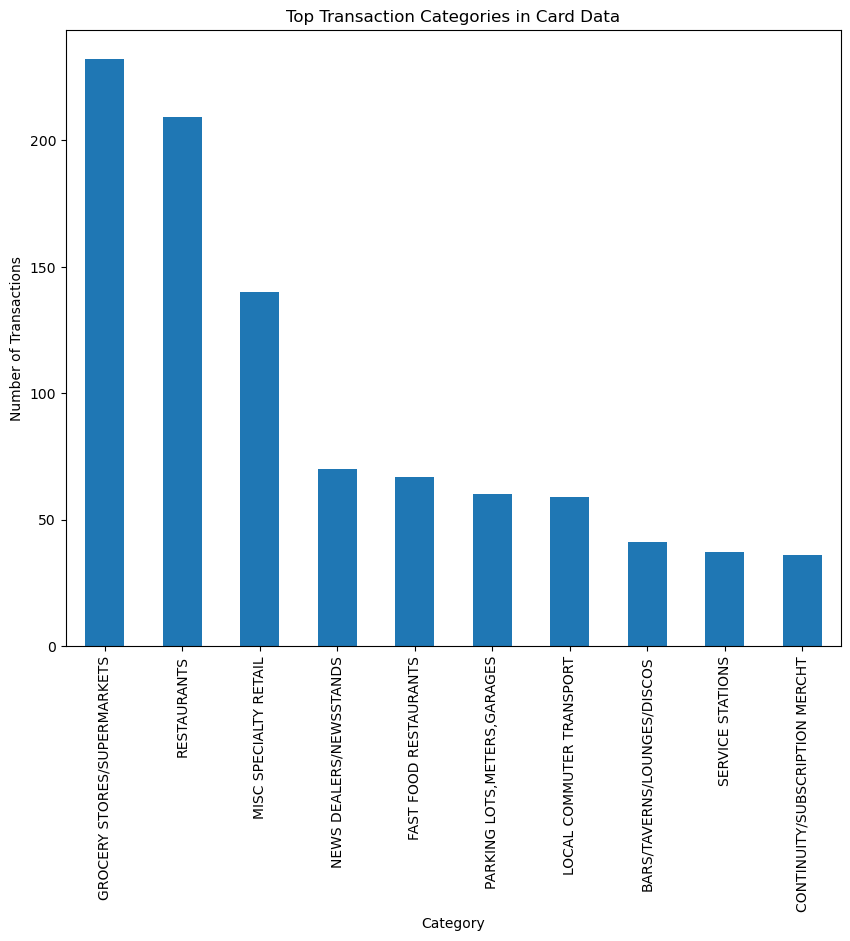

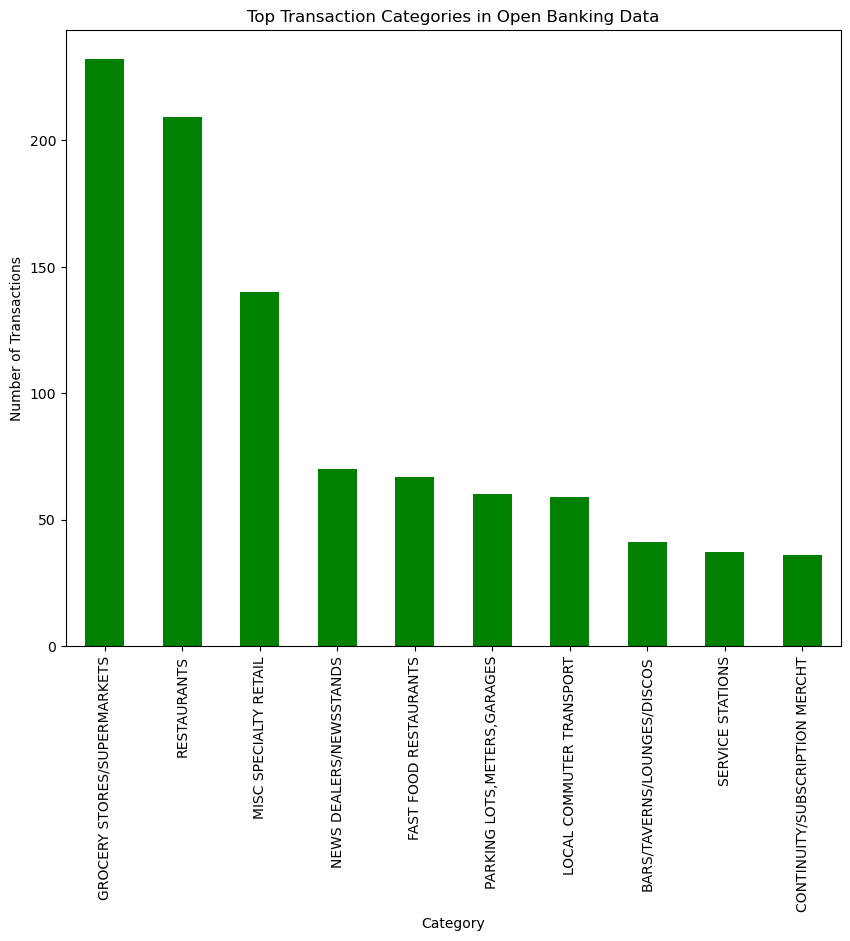

In [52]:
# Frequency analysis for each category field
card_category_counts = card_data['mrch_catg_rlup_nm'].value_counts()
banking_category_counts = open_banking_data['mrch_catg_rlup_nm2'].value_counts()

# Plot the top categories in card data
plt.figure(figsize=(10, 8))
card_category_counts.head(10).plot(kind='bar')
plt.title('Top Transaction Categories in Card Data')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

# Plot the top categories in open banking data
plt.figure(figsize=(10, 8))
banking_category_counts.head(10).plot(kind='bar', color='green')
plt.title('Top Transaction Categories in Open Banking Data')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

In [53]:
print(card_data.shape,open_banking_data.shape)
card_data.drop_duplicates(inplace=True)
open_banking_data.drop_duplicates(inplace=True)
print(card_data.shape,open_banking_data.shape)

(1379, 13) (1378, 8)
(1302, 13) (1074, 8)


In [54]:
print(card_data.columns)
print(open_banking_data.columns)

Index(['cpd_mnth_id', 'cpd_dt', 'cluster_name_adjusted', 'mrch_catg_cd',
       'mrch_catg_rlup_nm', 'merchant', 'cp_flag', 'domestic_flag',
       'intraregion_flag', 'interregion_flag', 'city_name', 'country_code',
       'spend'],
      dtype='object')
Index(['Name', 'Value.accountId', 'cluster_name_adjusted',
       'Value.amount.currencyCode', 'mrch_catg_rlup_nm2', 'Value.dates.booked',
       'amount', 'Category'],
      dtype='object')


In [56]:
car_data_sub1 = card_data.dropna(subset=['cluster_name_adjusted', 'mrch_catg_rlup_nm', 'spend'])
open_banking_data_sub1 = open_banking_data.dropna(subset=['cluster_name_adjusted', 'mrch_catg_rlup_nm2', 'amount'])

In [63]:
# Explore Customer Segments
# Group data by 'cluster_name_adjusted' and calculate relevant statistics
card_segment_data = card_data.groupby('cluster_name_adjusted').agg({
    'spend': ['count', 'mean', 'sum'],  # transaction count, average and total spend
    'mrch_catg_rlup_nm': lambda x: x.mode()[0]  # most common purchase category
}).reset_index()
# For open banking data
bank_segment_data = open_banking_data.groupby('cluster_name_adjusted').agg({
    'amount': ['count', 'mean', 'sum'],  # transaction count, average and total spend
    'mrch_catg_rlup_nm2': lambda x: x.mode()[0]  # most common purchase category
}).reset_index()

cluster_name_adjusted spend                       \
                        count       mean       sum   
0      Affluent Segment   247  28.273603   6983.58   
1                Family   253  23.959921   6061.86   
2         Frugal Family   325  25.330831   8232.52   
3     Sensible Spenders   113  38.716460   4374.96   
4        Urban Spenders   364  32.004121  11649.50   

             mrch_catg_rlup_nm  
                      <lambda>  
0  GROCERY STORES/SUPERMARKETS  
1  GROCERY STORES/SUPERMARKETS  
2                  RESTAURANTS  
3  GROCERY STORES/SUPERMARKETS  
4                  RESTAURANTS

cluster_name_adjusted amount                      \
                         count       mean      sum   
0      Affluent Segment    213  29.175869  6214.46   
1                Family    219  23.635205  5176.11   
2         Frugal Family    258  28.036589  7233.44   
3     Sensible Spenders     99  38.913535  3852.44   
4        Urban Spenders    285  29.639754  8447.33   

            mrch_catg_rlup_nm2  
                      <lambda>  
0  GROCERY STORES/SUPERMARKETS  
1  GROCERY STORES/SUPERMARKETS  
2  GROCERY STORES/SUPERMARKETS  
3  GROCERY STORES/SUPERMARKETS  
4                  RESTAURANTS

In [65]:
# Rename columns for clarity
card_segment_data.columns = ['Segment', 'Transaction Count', 'Average Spend', 'Total Spend', 'Most Common Category']
bank_segment_data.columns = ['Segment', 'Transaction Count', 'Average Spend', 'Total Spend', 'Most Common Category']
display(card_segment_data)
display(bank_segment_data)

,Segment,Transaction Count,Average Spend,Total Spend,Most Common Category
0,Affluent Segment,247,28.273603,6983.58,GROCERY STORES/SUPERMARKETS
1,Family,253,23.959921,6061.86,GROCERY STORES/SUPERMARKETS
2,Frugal Family,325,25.330831,8232.52,RESTAURANTS
3,Sensible Spenders,113,38.716460,4374.96,GROCERY STORES/SUPERMARKETS
4,Urban Spenders,364,32.004121,11649.50,RESTAURANTS


,Segment,Transaction Count,Average Spend,Total Spend,Most Common Category
0,Affluent Segment,213,29.175869,6214.46,GROCERY STORES/SUPERMARKETS
1,Family,219,23.635205,5176.11,GROCERY STORES/SUPERMARKETS
2,Frugal Family,258,28.036589,7233.44,GROCERY STORES/SUPERMARKETS
3,Sensible Spenders,99,38.913535,3852.44,GROCERY STORES/SUPERMARKETS
4,Urban Spenders,285,29.639754,8447.33,RESTAURANTS


In [68]:
anova_results_card = stats.f_oneway(
    *[group['spend'].values for name, group in card_data.groupby('cluster_name_adjusted')]
)
anova_results_bank = stats.f_oneway(
    *[group['amount'].values for name, group in open_banking_data.groupby('cluster_name_adjusted')]
)

print(f"ANOVA result on spend across card data segments: p-value = {anova_results_card.pvalue}")
print(f"ANOVA result on spend across banking data segments: p-value = {anova_results_bank.pvalue}")


ANOVA result on spend across card data segments: p-value = 0.0009137539238912993
ANOVA result on spend across banking data segments: p-value = 0.01156771804003214


In [69]:
card_data.columns

Index(['cpd_mnth_id', 'cpd_dt', 'cluster_name_adjusted', 'mrch_catg_cd',
       'mrch_catg_rlup_nm', 'merchant', 'cp_flag', 'domestic_flag',
       'intraregion_flag', 'interregion_flag', 'city_name', 'country_code',
       'spend'],
      dtype='object')

In [70]:
open_banking_data.columns

Index(['Name', 'Value.accountId', 'cluster_name_adjusted',
       'Value.amount.currencyCode', 'mrch_catg_rlup_nm2', 'Value.dates.booked',
       'amount', 'Category'],
      dtype='object')

In [73]:
display(card_data.head(5))

,cpd_mnth_id,cpd_dt,cluster_name_adjusted,mrch_catg_cd,mrch_catg_rlup_nm,merchant,cp_flag,domestic_flag,intraregion_flag,interregion_flag,city_name,country_code,spend
0,202306,2023-06-08,Family,7523,"PARKING LOTS,METERS,GARAGES",APCOA,0,1,0,0,Not_Available,826,6.25
1,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.39
2,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.41
5,202307,2023-07-15,Frugal Family,5311,DEPARTMENT STORES,TAKEAWAY.JE,0,1,0,0,Not_Available,826,38.79
6,202306,2023-06-25,Frugal Family,9399,GOV'T SERV - DEFAULT,MANCHESTER.GOV.UK,0,1,0,0,Not_Available,826,38.27


In [79]:
import pandas as pd

# List of clothing related categories
clothing_categories = [
    'CHILDREN/INFANTS WEAR STORES', 
    'MENS/WOMENS CLOTHING STORES', 
    'WOMENS READY TO WEAR STORES', 
    'MEN/BOYS CLOTHING/ACC STORES', 
    'FAMILY CLOTHING STORES', 
    'MISC APPAREL/ACCESS STORES'
]

# Filter data for clothing transactions
clothing_data = card_data[card_data['mrch_catg_rlup_nm'].isin(clothing_categories)]

# Aggregate spend by clothing category
total_spend_by_category = clothing_data.groupby('mrch_catg_rlup_nm')['spend'].sum()
display(total_spend_by_category)


def get_top_spends(group):
    return group.nlargest(5, 'spend').sort_values('spend', ascending=False)

# Apply the function to each group
top_spends_per_category = clothing_data.groupby('mrch_catg_rlup_nm').apply(get_top_spends)

# Reset the index to clean up the DataFrame
top_spends_per_category.reset_index(drop=True, inplace=True)

# Display the results
display(top_spends_per_category)

mrch_catg_rlup_nm
CHILDREN/INFANTS WEAR STORES     48.66
FAMILY CLOTHING STORES          269.22
MEN/BOYS CLOTHING/ACC STORES    121.20
MENS/WOMENS CLOTHING STORES     712.37
MISC APPAREL/ACCESS STORES       20.81
WOMENS READY TO WEAR STORES     189.11
Name: spend, dtype: float64

,cpd_mnth_id,cpd_dt,cluster_name_adjusted,mrch_catg_cd,mrch_catg_rlup_nm,merchant,cp_flag,domestic_flag,intraregion_flag,interregion_flag,city_name,country_code,spend
0,202307,2023-07-26,Affluent Segment,5641,CHILDREN/INFANTS WEAR STORES,MAPAC GROUP,0,1,0,0,Not_Available,826,48.66
1,202306,2023-06-04,Affluent Segment,5651,FAMILY CLOTHING STORES,PRIMARK,1,1,0,0,SUTTON,826,84.98
2,202307,2023-07-14,Affluent Segment,5651,FAMILY CLOTHING STORES,PRIMARK,1,1,0,0,SUTTON,826,79.64
3,202307,2023-07-24,Affluent Segment,5651,FAMILY CLOTHING STORES,PRIMARK,1,1,0,0,SUTTON,826,50.98
4,202306,2023-06-26,Affluent Segment,5651,FAMILY CLOTHING STORES,NEXT,1,1,0,0,SUTTON,826,48.42
5,202307,2023-07-13,Affluent Segment,5651,FAMILY CLOTHING STORES,NEXT,1,1,0,0,SUTTON,826,5.20
6,202306,2023-06-29,Urban Spenders,5611,MEN/BOYS CLOTHING/ACC STORES,LS GREENHITHE BLUEWATE,1,1,0,0,London,826,121.20
7,202306,2023-06-08,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,ASOS.COM,0,1,0,0,Not_Available,826,212.55
8,202306,2023-06-30,Sensible Spenders,5691,MENS/WOMENS CLOTHING STORES,YOURS,0,1,0,0,Peterborough,826,163.38
9,202307,2023-07-09,Frugal Family,5691,MENS/WOMENS CLOTHING STORES,SUMUP,1,1,0,0,CHESHIRE,826,158.40


# Feature Engineering

## Creating 'Purchase Frequency' as a feature
### Creating a feature for purchase frequency is a valuable way to analyze customer behavior over time. This can help in understanding how often customers shop, which is crucial for segmentation, predicting future purchases, and tailoring marketing strategies.
##### Calculated purchase history based on Cust_id and transaction_date from Open_banking_data, merging this in the crad_data using the common column - "cluster_name_adjusted

In [83]:
import pandas as pd

open_banking_data['cpd_dt'] = pd.to_datetime(open_banking_data['Value.dates.booked'])  # Convert to datetime
open_banking_data['month_year'] = open_banking_data['cpd_dt'].dt.to_period('M')  # Extract month-year

# Calculate the number of purchases per month per customer
purchase_frequency = open_banking_data.groupby(['Value.accountId', 'month_year']).size().reset_index(name='monthly_purchases')

# Calculate average monthly purchase frequency per customer
avg_purchase_frequency = purchase_frequency.groupby('Value.accountId')['monthly_purchases'].mean().reset_index(name='avg_monthly_purchases')


In [84]:
# Aggregate average purchase frequency by cluster in the banking data
avg_freq_by_cluster = avg_purchase_frequency.merge(open_banking_data[['Value.accountId', 'cluster_name_adjusted']], on='Value.accountId')
avg_freq_by_cluster = avg_freq_by_cluster.groupby('cluster_name_adjusted')['avg_monthly_purchases'].mean().reset_index()

# Assuming card_data is loaded and has 'cluster_name_adjusted'
card_data = pd.merge(card_data, avg_freq_by_cluster, on='cluster_name_adjusted', how='left')


In [85]:
display(card_data.head())

,cpd_mnth_id,cpd_dt,cluster_name_adjusted,mrch_catg_cd,mrch_catg_rlup_nm,merchant,cp_flag,domestic_flag,intraregion_flag,interregion_flag,city_name,country_code,spend,avg_monthly_purchases
0,202306,2023-06-08,Family,7523,"PARKING LOTS,METERS,GARAGES",APCOA,0,1,0,0,Not_Available,826,6.25,73.0
1,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.39,71.0
2,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,NYA,1,1,0,0,Not_Available,826,1.41,71.0
3,202307,2023-07-15,Frugal Family,5311,DEPARTMENT STORES,TAKEAWAY.JE,0,1,0,0,Not_Available,826,38.79,86.0
4,202306,2023-06-25,Frugal Family,9399,GOV'T SERV - DEFAULT,MANCHESTER.GOV.UK,0,1,0,0,Not_Available,826,38.27,86.0


## Creating 'discretionary_spend_level'
### Quantify discretionary spending levels to distinguish between high and low spenders.


In [87]:
card_data['discretionary_spend_level'] = card_data['cluster_name_adjusted'].map({
    'Family': 3,
    'Frugal Family': 2,
    'Affluent Spenders': 4,
    'Urban Spenders': 5,
    'Sensible Spenders': 1
})


In [88]:
import pandas as pd

# Load data
data = pd.read_csv('path_to_card_data.csv')

# Define all merchant categories and their specific groupings for broader analysis
all_categories = {
    'Family Outings': ['AMUSEMENT PARKS/CIRCUS', 'MOTION PICTURE THEATRES', 'PASSENGER RAILWAYS', 'TOURIST ATTRACTIONS AND EXHIBITS'],
    'Personal Services': ['BEAUTY/BARBER SHOPS', 'PROFESSIONAL SERVICES - DEF', 'MED/HEALTH SERVICES - DEF', 'DENTISTS/ORTHODONTISTS'],
    'Budget Merchants': ['DISCOUNT STORES', 'GROCERY STORES/SUPERMARKETS', 'LARGE DIGITAL GOODS MERCHANT'],
    'Affluent Spending': ['DEPARTMENT STORES', 'JEWELRY STORES', 'ART DEALERS & GALLERIES'],
    'Other': []
}

# Map general category to group
def map_category_to_group(category):
    for key, values in all_categories.items():
        if category in values:
            return key
    return 'Other'

# Apply the general mapping function to the data
data['category_group'] = data['mrch_catg_rlup_nm'].apply(map_category_to_group)

# Define clothing categories for specific spending type classification
clothing_categories = [
    'CHILDREN/INFANTS WEAR STORES', 
    'FAMILY CLOTHING STORES', 
    'MEN/BOYS CLOTHING/ACC STORES', 
    'MENS/WOMENS CLOTHING STORES', 
    'MISC APPAREL/ACCESS STORES', 
    'WOMENS READY TO WEAR STORES'
]

# Filter to include only clothing transactions
clothing_data = data[data['mrch_catg_rlup_nm'].isin(clothing_categories)]

# Calculate the average spend per clothing category
average_spend_per_category = clothing_data.groupby('mrch_catg_rlup_nm')['spend'].mean()

# Function to classify spending type for clothing
def classify_spend(row):
    if row['mrch_catg_rlup_nm'] in ['CHILDREN/INFANTS WEAR STORES', 'FAMILY CLOTHING STORES']:
        return 'Family Outings'
    else:
        average_spend = average_spend_per_category[row['mrch_catg_rlup_nm']]
        return 'Affluent Spending' if row['spend'] > average_spend else 'Budget'

# Apply the clothing-specific classification to each row in the filtered data
clothing_data['spending_category'] = clothing_data.apply(classify_spend, axis=1)

# Merge the results back to the main data
data = data.merge(clothing_data[['mrch_catg_rlup_nm', 'spending_category']], on='mrch_catg_rlup_nm', how='left')

# Display the results
print(data[['mrch_catg_rlup_nm', 'spend', 'category_group', 'spending_category']])


                 mrch_catg_rlup_nm   spend  spending_category
5     CHILDREN/INFANTS WEAR STORES   48.66     Family Outings
6      MENS/WOMENS CLOTHING STORES  212.55  Affluent Spending
77     WOMENS READY TO WEAR STORES   96.78  Affluent Spending
78     WOMENS READY TO WEAR STORES   70.25  Affluent Spending
397    MENS/WOMENS CLOTHING STORES  158.40  Affluent Spending
636    MENS/WOMENS CLOTHING STORES   21.53             Budget
637    MENS/WOMENS CLOTHING STORES   72.92             Budget
638    MENS/WOMENS CLOTHING STORES   28.85             Budget
852   MEN/BOYS CLOTHING/ACC STORES  121.20             Budget
973    MENS/WOMENS CLOTHING STORES   54.74             Budget
1043   MENS/WOMENS CLOTHING STORES  163.38  Affluent Spending
1182        FAMILY CLOTHING STORES   84.98     Family Outings
1184        FAMILY CLOTHING STORES   48.42     Family Outings
1185        FAMILY CLOTHING STORES    5.20     Family Outings
1190   WOMENS READY TO WEAR STORES   22.08             Budget
1191    

C:\Users\skotian\AppData\Local\Temp\ipykernel_14696\86152404.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing_data['spending_category'] = clothing_data.apply(classify_spend, axis=1)


In [89]:
clothing_data

,cpd_mnth_id,cpd_dt,cluster_name_adjusted,mrch_catg_cd,mrch_catg_rlup_nm,merchant,cp_flag,domestic_flag,intraregion_flag,interregion_flag,city_name,country_code,spend,avg_monthly_purchases,discretionary_spend_level,spending_category
5,202307,2023-07-26,Affluent Segment,5641,CHILDREN/INFANTS WEAR STORES,MAPAC GROUP,0,1,0,0,Not_Available,826,48.66,71.0,NaN,Family Outings
6,202306,2023-06-08,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,ASOS.COM,0,1,0,0,Not_Available,826,212.55,71.0,NaN,Affluent Spending
77,202306,2023-06-01,Affluent Segment,5621,WOMENS READY TO WEAR STORES,PAYPAL,0,1,0,0,Not_Available,826,96.78,71.0,NaN,Affluent Spending
78,202306,2023-06-03,Affluent Segment,5621,WOMENS READY TO WEAR STORES,PAYPAL,0,1,0,0,Not_Available,826,70.25,71.0,NaN,Affluent Spending
397,202307,2023-07-09,Frugal Family,5691,MENS/WOMENS CLOTHING STORES,SUMUP,1,1,0,0,CHESHIRE,826,158.40,86.0,2.0,Affluent Spending
636,202305,2023-05-09,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,H M HENNES & MAURITZ,1,1,0,0,H M REDHILL,826,21.53,71.0,NaN,Budget
637,202307,2023-07-27,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,H M HENNES & MAURITZ,1,1,0,0,H M REDHILL,826,72.92,71.0,NaN,Budget
638,202306,2023-06-03,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,H M HENNES & MAURITZ,1,1,0,0,H M SUTTON,826,28.85,71.0,NaN,Budget
852,202306,2023-06-29,Urban Spenders,5611,MEN/BOYS CLOTHING/ACC STORES,LS GREENHITHE BLUEWATE,1,1,0,0,London,826,121.20,95.0,5.0,Budget
973,202307,2023-07-02,Frugal Family,5691,MENS/WOMENS CLOTHING STORES,WHITE RIBBON BOUTIQUE NAN,1,1,0,0,Nantwich,826,54.74,86.0,2.0,Budget


## Creating 
### Feature that aggregates spend by categories relevant to each persona, such as "family outings", "personal services", or "budget merchants".